In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns  
import matplotlib.pyplot as plt

# might be needed depending on your version of Jupyter
%matplotlib inline

In [ ]:
df = pd.read_csv('../Oil & Gas Production/Pandey_Ch07_Production_Engineering_Code/data/Well_Monthly_ProdT.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   START_DATE  528 non-null    object
 1   OIL         528 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


In [ ]:
df.isnull().sum()

START_DATE    0
OIL           0
dtype: int64

In [ ]:
df.head()

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857


In [ ]:
df

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857
...,...,...
523,2017-01-08,8450763
524,2017-01-09,8168717
525,2017-01-10,8668929
526,2017-01-11,8452498


In [ ]:
df.corr()['OIL'].sort_values()

OIL    1.0
Name: OIL, dtype: float64

In [ ]:
df.corr()

,OIL
OIL,1.0


In [ ]:
df.corr()['OIL'].sort_values()

OIL    1.0
Name: OIL, dtype: float64

In [ ]:
df

,START_DATE,OIL
0,1974-01-01,7134368
1,1974-01-02,9528303
2,1974-01-03,12263786
3,1974-01-04,13153821
4,1974-01-05,12240857
...,...,...
523,2017-01-08,8450763
524,2017-01-09,8168717
525,2017-01-10,8668929
526,2017-01-11,8452498


In [ ]:
df.set_index('START_DATE',inplace=True)

In [ ]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 1974-01-01 to 2017-01-12
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   OIL     528 non-null    int64
dtypes: int64(1)
memory usage: 8.2+ KB


<AxesSubplot:xlabel='START_DATE'>

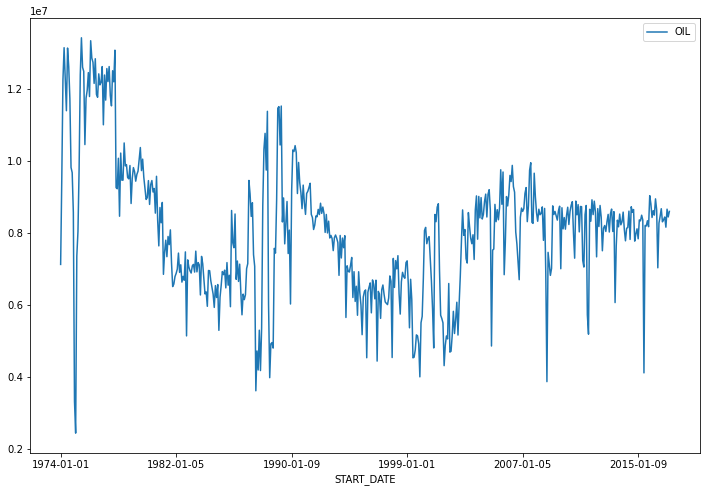

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
len(df)

528

In [ ]:
test_size=24
test_ind=len(df)-test_size
test_ind

504

In [ ]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [ ]:
train

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2015-01-08,8122396
2015-01-09,7845614
2015-01-10,8370654


In [ ]:
test

,OIL
START_DATE,
2016-01-01,8367189
2016-01-02,4121904
2016-01-03,8216246
2016-01-04,8201769
2016-01-05,8347271
2016-01-06,8182295
2016-01-07,9044375
2016-01-08,8816330
2016-01-09,8437837


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length_batch=18
generator = TimeseriesGenerator(scaled_train,
                               scaled_train,
                               length=length_batch,
                               batch_size=1)

In [ ]:
X,y=generator[0]

In [ ]:
X

array([[[0.42674138],
        [0.64475407],
        [0.89387111],
        [0.97492549],
        [0.89178299],
        [0.81550198],
        [0.97401408],
        [0.92727422],
        [0.8456013 ],
        [0.6720002 ],
        [0.65880534],
        [0.55819057],
        [0.08059922],
        [0.        ],
        [0.4477554 ],
        [0.50992139],
        [0.67023738],
        [0.9067383 ]]])

In [ ]:
y

array([[1.]])

In [ ]:
scaled_train

array([[0.42674138],
       [0.64475407],
       [0.89387111],
       [0.97492549],
       [0.89178299],
       [0.81550198],
       [0.97401408],
       [0.92727422],
       [0.8456013 ],
       [0.6720002 ],
       [0.65880534],
       [0.55819057],
       [0.08059922],
       [0.        ],
       [0.4477554 ],
       [0.50992139],
       [0.67023738],
       [0.9067383 ],
       [1.        ],
       [0.92530923],
       [0.91517601],
       [0.72984425],
       [0.8471613 ],
       [0.86719188],
       [0.91194179],
       [0.8513787 ],
       [0.99254739],
       [0.94866818],
       [0.93795267],
       [0.88462972],
       [0.94698714],
       [0.85694418],
       [0.84954521],
       [0.908741  ],
       [0.88081048],
       [0.88750777],
       [0.92712578],
       [0.77990621],
       [0.90580831],
       [0.84235752],
       [0.92217528],
       [0.88924236],
       [0.92719799],
       [0.85409719],
       [0.82780628],
       [0.91664868],
       [0.8886118 ],
       [0.968

In [ ]:
import tensorflow as tf

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
n_features=1

In [ ]:
model=Sequential()

model.add(LSTM(150,activation='relu',input_shape=(length_batch,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,
                                        length=length_batch,
                                        batch_size=1)

In [ ]:
model.fit(generator,epochs=20,
          validation_data=validation_generator,
          callbacks=[early_stop])

Epoch 1/20
486/486 [==============================] - 26s 43ms/step - loss: 0.0146 - val_loss: 2.4584e-04
Epoch 2/20
486/486 [==============================] - 20s 42ms/step - loss: 0.0109 - val_loss: 0.0047
Epoch 3/20
486/486 [==============================] - 20s 41ms/step - loss: 0.0097 - val_loss: 0.0015


In [ ]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

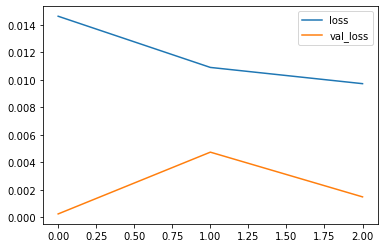

In [ ]:
losses.plot()

In [ ]:
test_predictions = []
first_eval_batch=scaled_train[-length_batch:]
current_batch=first_eval_batch.reshape((1,length_batch,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
test['Predictions'] = true_predictions

<ipython-input-250-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [ ]:
test

,OIL,Predictions
START_DATE,,
2016-01-01,8367189,8.764556e+06
2016-01-02,4121904,8.897600e+06
2016-01-03,8216246,9.007675e+06
2016-01-04,8201769,9.099076e+06
2016-01-05,8347271,9.178990e+06
2016-01-06,8182295,9.247171e+06
2016-01-07,9044375,9.317431e+06
2016-01-08,8816330,9.380874e+06
2016-01-09,8437837,9.456326e+06


<AxesSubplot:xlabel='START_DATE'>

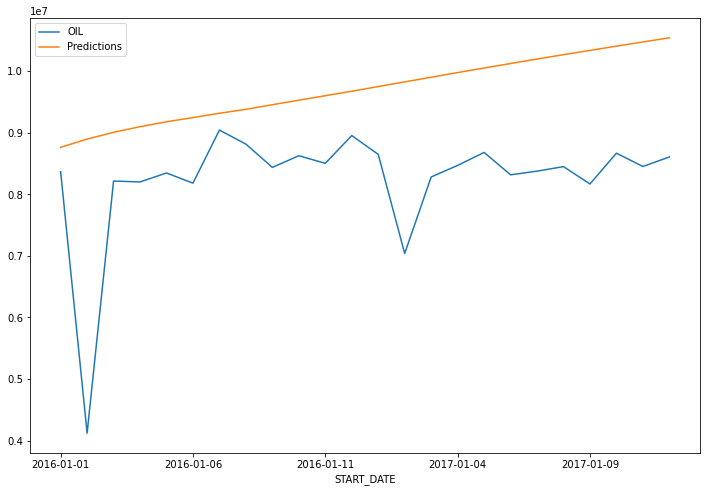

In [ ]:
test.plot(figsize=(12,8))

In [ ]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(df)

In [ ]:
length = 12

generator=TimeseriesGenerator(scaled_full_data,scaled_full_data,
                              length=length,
                              batch_size=1)

In [ ]:
model=Sequential()

model.add(LSTM(200,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit(generator,epochs=3)

Epoch 1/3
516/516 [==============================] - 30s 45ms/step - loss: 0.0187
Epoch 2/3
516/516 [==============================] - 23s 44ms/step - loss: 0.0138
Epoch 3/3
516/516 [==============================] - 20s 40ms/step - loss: 0.0120


In [ ]:
forecast = []

periods = 12

first_eval_batch=scaled_train[-length_batch:]
current_batch=first_eval_batch.reshape((1,length_batch,n_features))

for i in range(periods):
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
forecast = scaler.inverse_transform(forecast)

In [ ]:
df

,OIL
START_DATE,
1974-01-01,7134368
1974-01-02,9528303
1974-01-03,12263786
1974-01-04,13153821
1974-01-05,12240857
...,...
2017-01-08,8450763
2017-01-09,8168717
2017-01-10,8668929


In [ ]:
forecast

array([[8761801.01978528],
       [8918946.84370506],
       [9015031.59933341],
       [9090458.97680867],
       [9215858.20268917],
       [9328830.40750027],
       [9468325.63342142],
       [9468319.08840585],
       [9559900.21881807],
       [9520220.40740216],
       [9495898.47502947],
       [9369903.65273178]])

In [ ]:
forecast_index = pd.date_range(start='2018-01-01',periods=periods,freq="MS")

In [ ]:
forecast_index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                          columns=['Forecast'])

In [ ]:
forecast_df

,Forecast
2018-01-01,8.761801e+06
2018-02-01,8.918947e+06
2018-03-01,9.015032e+06
2018-04-01,9.090459e+06
2018-05-01,9.215858e+06
2018-06-01,9.328830e+06
2018-07-01,9.468326e+06
2018-08-01,9.468319e+06
2018-09-01,9.559900e+06
2018-10-01,9.520220e+06
